In [1]:
import cv2 as cv
import seaborn as sns
import os
import time
import pandas as pd
import SimpleITK as sitk
from skimage import io

In [2]:
if not os.path.exists('D:/Kaggle datasets/Thesis'):
    
    try:
        
        os.mkdir('D:/Kaggle datasets/Thesis/')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_0')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_1')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_2')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_3')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_4')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_0')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_1')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_2')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_3')
        os.mkdir('D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_4')
        
    except OSError:
        
        print('Creation of directory failed')
        
    else:
        
        print('Successfully created directory')
        
else:
    
    print('Directory already exists')

Directory already exists


In [3]:
df_train = pd.read_csv('D:/Kaggle datasets/diabetic-retinopathy-detection/trainLabels.csv')

df_train.head()

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1


In [4]:
df_test = pd.read_csv('D:/Kaggle datasets/diabetic-retinopathy-detection/retinopathy_solution.csv')

df_test.head()

,image,level,Usage
0,1_left,0,Private
1,1_right,0,Private
2,2_left,0,Public
3,2_right,0,Public
4,3_left,2,Private


In [5]:
#check total number of images

df_images = df_train.count()

print (f'Toal number of images in the training set {df_images}')

# number of images belonging to each level

unique_count = df_train['level'].value_counts()

unique_count

Toal number of images in the training set image    35126
level    35126
dtype: int64


0    25810
2     5292
1     2443
3      873
4      708
Name: level, dtype: int64

<AxesSubplot:xlabel='level', ylabel='count'>

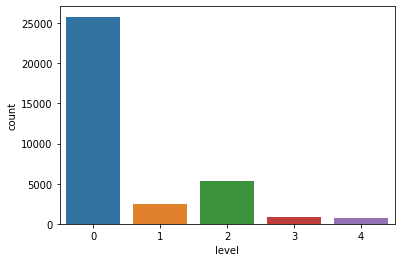

In [7]:
#check number of images in each class

sns.countplot(x = 'level', data = df_train)

In [8]:
start_time = time.time()

In [9]:
def create_dataset(df,path,image_size,dataset):
    
    for i, item in df.iterrows():
        
        img = sitk.ReadImage(path + item[0] +'.jpeg')
        img = sitk.GetArrayFromImage(img)
        img = cv.resize(img,(image_size,image_size))
        
        if item[1]==0:
            io.imsave(f'D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/{dataset}/Level_0/'+item[0]+f'_{dataset}_Level_0.png',img)
        elif item[1]==1:
            io.imsave(f'D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/{dataset}/Level_1/'+item[0]+f'_{dataset}_Level_1.png',img)
        elif item[1]==2:
            io.imsave(f'D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/{dataset}/Level_2/'+item[0]+f'_{dataset}_Level_2.png',img)
        elif item[1]==3:
            io.imsave(f'D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/{dataset}/Level_3/'+item[0]+f'_{dataset}_Level_3.png',img)
        else:
            io.imsave(f'D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/{dataset}/Level_4/'+item[0]+f'_{dataset}_Level_4.png',img)

In [10]:
path_train = 'D:/Kaggle datasets/diabetic-retinopathy-detection/train/'

create_dataset(df_train,path_train,image_size=512,dataset='Train')

print('Training set created')

C:\Users\asarkar.NATICK-NT\.conda\envs\gpu\lib\site-packages\ipykernel_launcher.py:12: UserWarning: D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_1/766_left_Train_Level_1.png is a low contrast image
  if sys.path[0] == '':
C:\Users\asarkar.NATICK-NT\.conda\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_0/1557_left_Train_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_0/1986_left_Train_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Train/Level_0/2516_left_Train_Level_0.png is a low contrast image
  # Remove the CW

Training set created


In [11]:
path_test = 'D:/Kaggle datasets/diabetic-retinopathy-detection/test/'

create_dataset(df_test,path_test,image_size=512,dataset='Test')

print('Test set created')

C:\Users\asarkar.NATICK-NT\.conda\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_0/586_left_Test_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_0/3517_left_Test_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_0/4751_right_Test_Level_0.png is a low contrast image
  # Remove the CWD from sys.path while we load stuff.
C:\Users\asarkar.NATICK-NT\.conda\envs\gpu\lib\site-packages\ipykernel_launcher.py:10: UserWarning: D:/Kaggle datasets/Thesis/Diabetic_Retinopathy/Test/Level_0/5231_left_Test_Level_0.png is a low contrast 

Test set created


In [12]:
end_time= time.time()

print("--- %s seconds ---" % (end_time - start_time))

--- 21920.613896608353 seconds ---
